In [89]:
import _init_paths
import numpy as np
import matplotlib.pyplot as plt
import nengo, nengo_loihi
import tensorflow as tf

from utils.results_analysis_utils.analyse_results import get_loihi_probes_output
from utils.base_utils.data_prep_utils import get_exp_dataset

In [90]:
loihi_otpt = np.load("/homes/rgaurav/spiking_investigation/experiment_outputs/cifar10/scale_10_all_100/nengo_loihi_otpts/"
           "Layer_probes_otpt_batch_start_0_end_100.npy", allow_pickle=True)

loihi_otpt = get_loihi_probes_output(loihi_otpt, 80)
print(loihi_otpt.keys())
loihi_otpt = loihi_otpt["conv2d_2.0"]
print(loihi_otpt[0].shape)

dict_keys(['dense_1.0', 'conv2d_2.0'])
(80, 2704)


In [91]:
ndl_otpt = np.load("/homes/rgaurav/spiking_investigation/experiment_outputs/cifar10/model_1/ndl_train_test_results/"
                   "ndl_test_only_results/sim_lyr_probes_otpt.npy", allow_pickle=True)
ndl_otpt = ndl_otpt.item()
print(ndl_otpt.keys())
ndl_otpt = ndl_otpt["conv2d_5.0"]
print(ndl_otpt[0].shape)

dict_keys(['conv2d_5.0'])
(50, 2704)


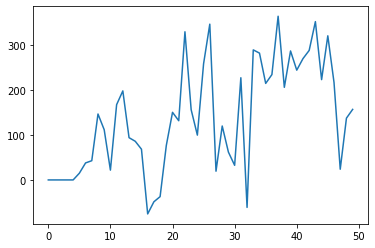

In [53]:
neuron_index = 1383 #1836 #1383
plt.plot(ndl_otpt[0][:, neuron_index])

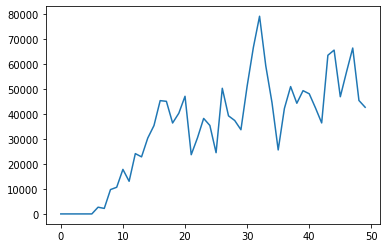

In [54]:
plt.plot(loihi_otpt[0][:, neuron_index])

# SCATTER PLOTS 

0 Correlation: [[1.         0.80711216]
 [0.80711216 1.        ]]
1 Correlation: [[1.         0.87387152]
 [0.87387152 1.        ]]
2 Correlation: [[1.         0.82311847]
 [0.82311847 1.        ]]
3 Correlation: [[1.         0.86054342]
 [0.86054342 1.        ]]
4 Correlation: [[1.        0.7797355]
 [0.7797355 1.       ]]
5 Correlation: [[1.         0.80657928]
 [0.80657928 1.        ]]
6 Correlation: [[1.         0.84372326]
 [0.84372326 1.        ]]
7 Correlation: [[1.        0.7872719]
 [0.7872719 1.       ]]
8 Correlation: [[1.         0.81204799]
 [0.81204799 1.        ]]
9 Correlation: [[1.         0.81285638]
 [0.81285638 1.        ]]


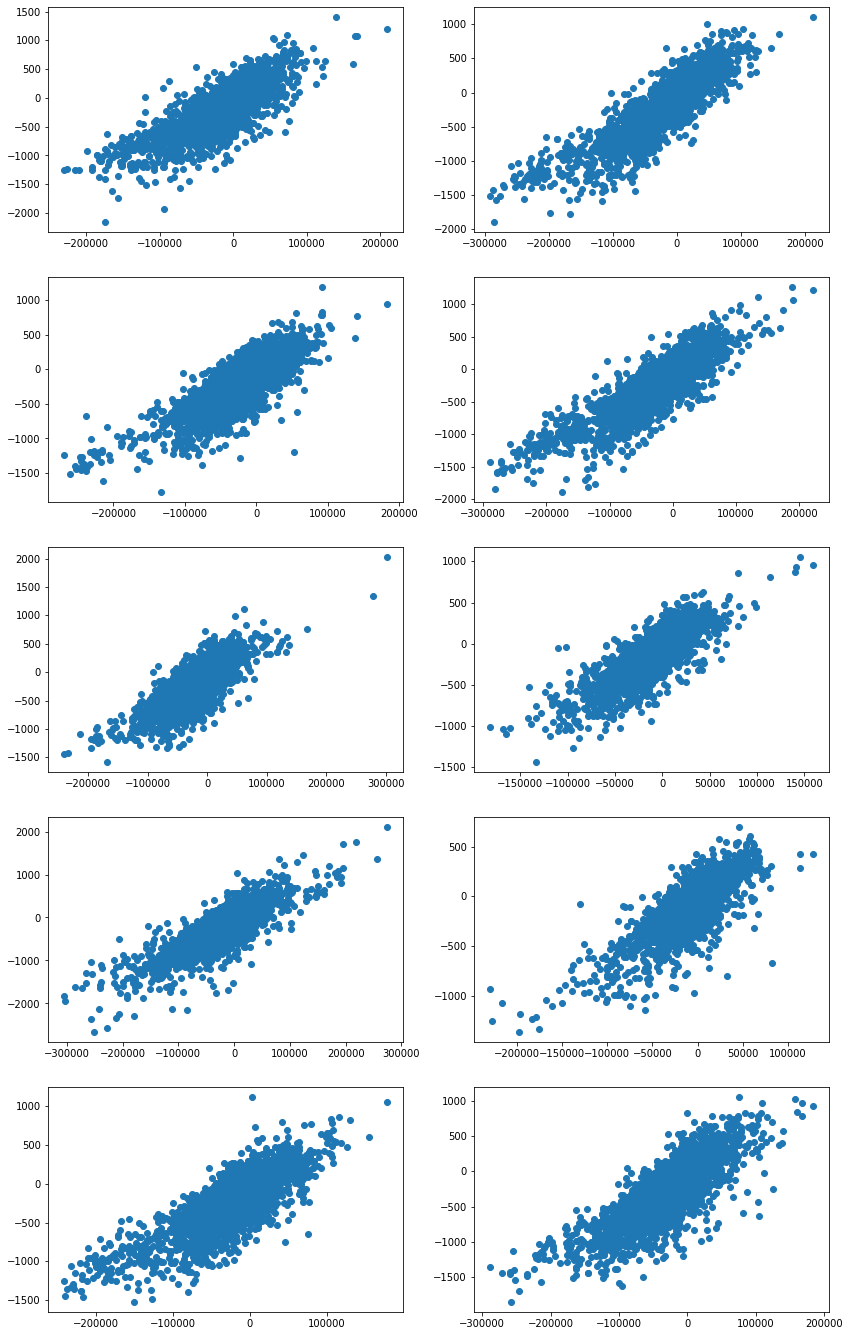

In [92]:
loihi_otpt = np.load("/homes/rgaurav/spiking_investigation/experiment_outputs/cifar10/scale_10_all_100/nengo_loihi_otpts/"
           "Layer_probes_otpt_batch_start_0_end_100.npy", allow_pickle=True)
loihi_otpt = get_loihi_probes_output(loihi_otpt, 80)
loihi_otpt = loihi_otpt["conv2d_2.0"]

ndl_otpt = np.load("/homes/rgaurav/spiking_investigation/experiment_outputs/cifar10/model_1/ndl_train_test_results/"
                   "ndl_test_only_results/sim_lyr_probes_otpt.npy", allow_pickle=True)
ndl_otpt = ndl_otpt.item()
ndl_otpt = ndl_otpt["conv2d_5.0"]

fig, axs = plt.subplots(5, 2, figsize=(14, 24))
for i in range(10): # Number of Test Images.

  loh_o = np.mean(loihi_otpt[i][-5:, :], axis=0)
  ndl_o = np.mean(ndl_otpt[i][-5:, :], axis=0)
  print(i, "Correlation: %s" % np.corrcoef(loh_o, ndl_o))
  
#   loh_o, ndl_o = loh_o[loh_o>0], ndl_o[ndl_o>0]
#   print(loh_o.shape, ndl_o.shape)
    
  row, col = i // 2, i % 2
  axs[row, col].scatter(loh_o, ndl_o)
  

In [97]:
# loihi_otpt = np.load("/homes/rgaurav/spiking_investigation/experiment_outputs/mnist/model_1/nengo_loihi_otpts/"
#            "Layer_probes_otpt_batch_start_0_end_20.npy", allow_pickle=True)
# loihi_otpt = get_loihi_probes_output(loihi_otpt, 50)
# loihi_otpt = loihi_otpt["conv2d_1.0"]

# ndl_otpt = np.load("/homes/rgaurav/spiking_investigation/experiment_outputs/mnist/model_1/ndl_train_test_results/"
#                    "ndl_test_only_results/sim_lyr_probes_otpt.npy", allow_pickle=True)
# ndl_otpt = ndl_otpt.item()
# ndl_otpt = ndl_otpt["conv2d_5.0"]

# fig, axs = plt.subplots(5, 2, figsize=(14, 24))
# for i in range(10): # Number of Test Images.

#   loh_o = np.mean(loihi_otpt[i][-5:, :], axis=0)
#   ndl_o = np.mean(ndl_otpt[i][-5:, :], axis=0)
#   print(i, "Correlation: %s" % np.corrcoef(loh_o, ndl_o))
#   row, col = i // 2, i % 2
#   axs[row, col].scatter(loh_o, ndl_o)

dict_keys(['conv2d_5.0'])


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2048 and the array at index 1 has size 1936

In [ ]:
# plt.scatter(np.mean(loihi_otpt[1][-5:, :], axis=0), 
            np.mean(ndl_otpt[1][-5:, :], axis=0))

print("Covariance: {}".format(np.cov(np.mean(loihi_otpt[1][-5:, :], axis=0), np.mean(ndl_otpt[1][-5:, :], axis=0))))
print("Correlation: %s" % np.corrcoef(np.mean(loihi_otpt[1][-5:, :], axis=0), np.mean(ndl_otpt[1][-5:, :], axis=0)))

# ################################################################

In [111]:
with nengo.Network(seed=0) as net:
  inp = nengo.Node(1)
  ens1 = nengo.Ensemble(1, dimensions=1, encoders=[[1]], max_rates=[250], 
                        neuron_type=nengo_loihi.neurons.LoihiSpikingRectifiedLinear())
  ens2 = nengo.Ensemble(1, dimensions=1, encoders=[[1]], max_rates=[250],
                       neuron_type=nengo_loihi.neurons.LoihiSpikingRectifiedLinear())
  nengo.Connection(inp, ens1, synapse=None)
  nengo.Connection(ens1, ens2, synapse=0.005)
  
  ens2_probe = nengo.Probe(ens2.neurons, attr="input")
  ens1_probe = nengo.Probe(ens1.neurons, synapse=0.005)
  ens2_probe_otp = nengo.Probe(ens2.neurons, synapse=0.005)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

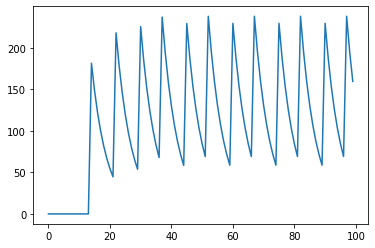

In [112]:
with nengo.Simulator(net, seed=0) as sim:
  sim.run(0.1)
  
#plt.plot(sim.data[ens2_probe])
# plt.plot(sim.data[ens1_probe])
plt.plot(sim.data[ens2_probe_otp])

In [113]:
with nengo_loihi.Simulator(net, target="loihi", seed=0) as loihi_sim:
  loihi_sim.run(0.1)

INFO:DRV:  SLURM is being run in background
INFO:DRV:  Connecting to 10.212.98.178:34413
INFO:DRV:      Host server up..............Done 1.06s
INFO:DRV:      Encoding axons/synapses.....Done 3.19ms
INFO:DRV:      Compiling Embedded snips....Done 0.32s
INFO:DRV:      Compiling MPDS Registers....Done 0.78ms
INFO:HST:  Args chip=0 cpu=0 /homes/rgaurav/nxsdk_1_nengo_loihi/lib/python3.8/site-packages/nxsdk/driver/compilers/../../../temp/1625959074.6739228/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 
INFO:HST:  Nx...
INFO:DRV:      Booting up..................Done 1.13s
INFO:DRV:      Encoding probes.............Done 0.71ms
INFO:DRV:      Transferring probes.........Done 0.11s
INFO:DRV:      Configuring registers.......Done 0.05s
INFO:DRV:      Transferring spikes.........Done 8.24ms
INFO:DRV:      Executing...................Done 0.02s
INFO:DRV:      Processing timeseries.......Done 0.01s
INFO:DRV:  Executor: 100 timesteps.........Done 0.21s
INFO:HST:  chip=0 cpu=0 halted, status=0x0

In [114]:
#plt.plot(loihi_sim.data[ens2_probe])
# plt.plot(loihi_sim.data[ens1_probe])
plt.plot(loihi_sim.data[ens2_probe_otp])

# #############################################################

Covariance: [[841.66666667 841.66666667]
 [841.66666667 841.66666667]]
Explicit Covariance calculation: 841.6666666666666
Correlation: [[1. 1.]
 [1. 1.]]


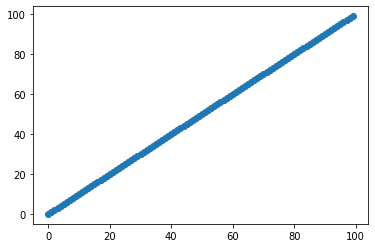

In [57]:
k1 = np.arange(0, 100)
k2 = np.arange(0, 100)

plt.scatter(k1, k2)
print("Covariance: {}".format(np.cov(k1, k2)))
print("Explicit Covariance calculation: %s" % (np.sum((k1 - np.mean(k1)) * (k2 - np.mean(k2)))/(k1.shape[0]-1)))
print("Correlation: %s" % np.corrcoef(k1, k2))

Covariance: [[841.66666667 841.66666667]
 [841.66666667 841.66666667]]
Explicit Covariance calculation: 841.6666666666666
Correlation: [[1. 1.]
 [1. 1.]]


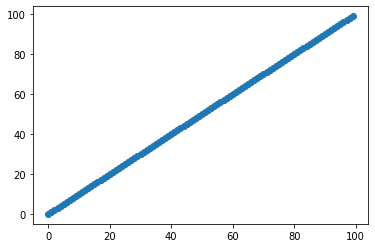

In [64]:
k1 = np.arange(0, 100)
k2 = np.arange(0, 100)*1

plt.scatter(k1, k2)
print("Covariance: {}".format(np.cov(k1, k2)))
print("Explicit Covariance calculation: %s" % (np.sum((k1 - np.mean(k1)) * (k2 - np.mean(k2)))/(k1.shape[0]-1)))
print("Correlation: %s" % np.corrcoef(k1, k2))

In [60]:
k1 = np.arange(0, 100)
k2 = np.arange(0, 100)+50

plt.scatter(k1, k2)
print("Covariance: {}".format(np.cov(k1, k2)))
print("Explicit Covariance calculation: %s" % (np.sum((k1 - np.mean(k1)) * (k2 - np.mean(k2)))/(k1.shape[0]-1)))
print("Correlation: %s" % np.corrcoef(k1, k2))

Covariance: [[841.66666667 841.66666667]
 [841.66666667 841.66666667]]
Explicit Covariance calculation: 841.6666666666666
Correlation: [[1. 1.]
 [1. 1.]]


# ##################### DATASET  #############################

In [12]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [14]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

# ACCURACY

In [36]:
path = "/homes/rgaurav/spiking_investigation/experiment_outputs/cifar10/model_1/nengo_loihi_otpts"
f1 = np.load(path+"/Acc_and_preds_batch_start_0_end_75.npy", allow_pickle=True)
f2 = np.load(path+"/Acc_and_preds_batch_start_75_end_150.npy", allow_pickle=True)
_, _, _, test_y = get_exp_dataset("cifar10")

In [39]:
pred_lbls = []
pred_lbls.extend(f1[1])
pred_lbls.extend(f2[1])
print(pred_lbls)

[2, 8, 8, 8, 6, 3, 5, 3, 5, 1, 0, 9, 5, 7, 9, 5, 5, 7, 8, 5, 7, 2, 2, 9, 4, 2, 2, 2, 8, 4, 3, 5, 5, 5, 9, 2, 5, 0, 9, 5, 0, 2, 5, 2, 0, 9, 3, 7, 7, 2, 9, 4, 5, 3, 8, 8, 5, 5, 5, 5, 7, 5, 7, 0, 5, 2, 8, 2, 3, 9, 2, 3, 8, 8, 9, 2, 0, 3, 3, 8, 8, 1, 1, 3, 0, 7, 2, 8, 8, 9, 0, 3, 8, 5, 7, 3, 4, 0, 2, 7, 7, 3, 5, 3, 1, 1, 3, 2, 3, 5, 3, 0, 2, 2, 9, 5, 0, 2, 3, 3, 8, 3, 2, 2, 0, 0, 8, 3, 3, 0, 2, 1, 8, 3, 1, 3, 9, 4, 2, 8, 3, 5, 5, 5, 8, 3, 3, 5, 5, 2]


In [40]:
print(np.mean(np.argmax(test_y[:100], axis=-1) == pred_lbls[:100]))

0.52


# ISI Distribution of Conv layer spikes (just before the MaxPooling Layer)

In [47]:
def get_isi(array):
  t = 0
  isi_lst = []
  for i, k in enumerate(array):
    if k!=0 and t==0:
      t = i
    elif k!=0: 
      isi_lst.append(i-t)
      t = i

  return isi_lst

## MNIST (First 20 images, 2048 neurons from Conv)

In [75]:
mnist_otpt = np.load("/homes/rgaurav/spiking_investigation/experiment_outputs/mnist/model_1/nengo_loihi_otpts/"
                    "/Layer_probes_otpt_batch_start_0_end_20.npy", allow_pickle=True)
mnist_otpt = get_loihi_probes_output(mnist_otpt, 50)
print(mnist_otpt.keys())
mnist_conv = mnist_otpt["conv2d_1.0"]
dikt = {}
for i, mat in enumerate(mnist_conv):
  neurons_isi = []
  for neuron in range(mat.shape[1]):
    isi_lst = get_isi(mat[:, neuron])
    if isi_lst:
      neurons_isi.append(np.mean(isi_lst))
  dikt[i] = neurons_isi

dict_keys(['dense_1.0', 'conv2d_1.0'])


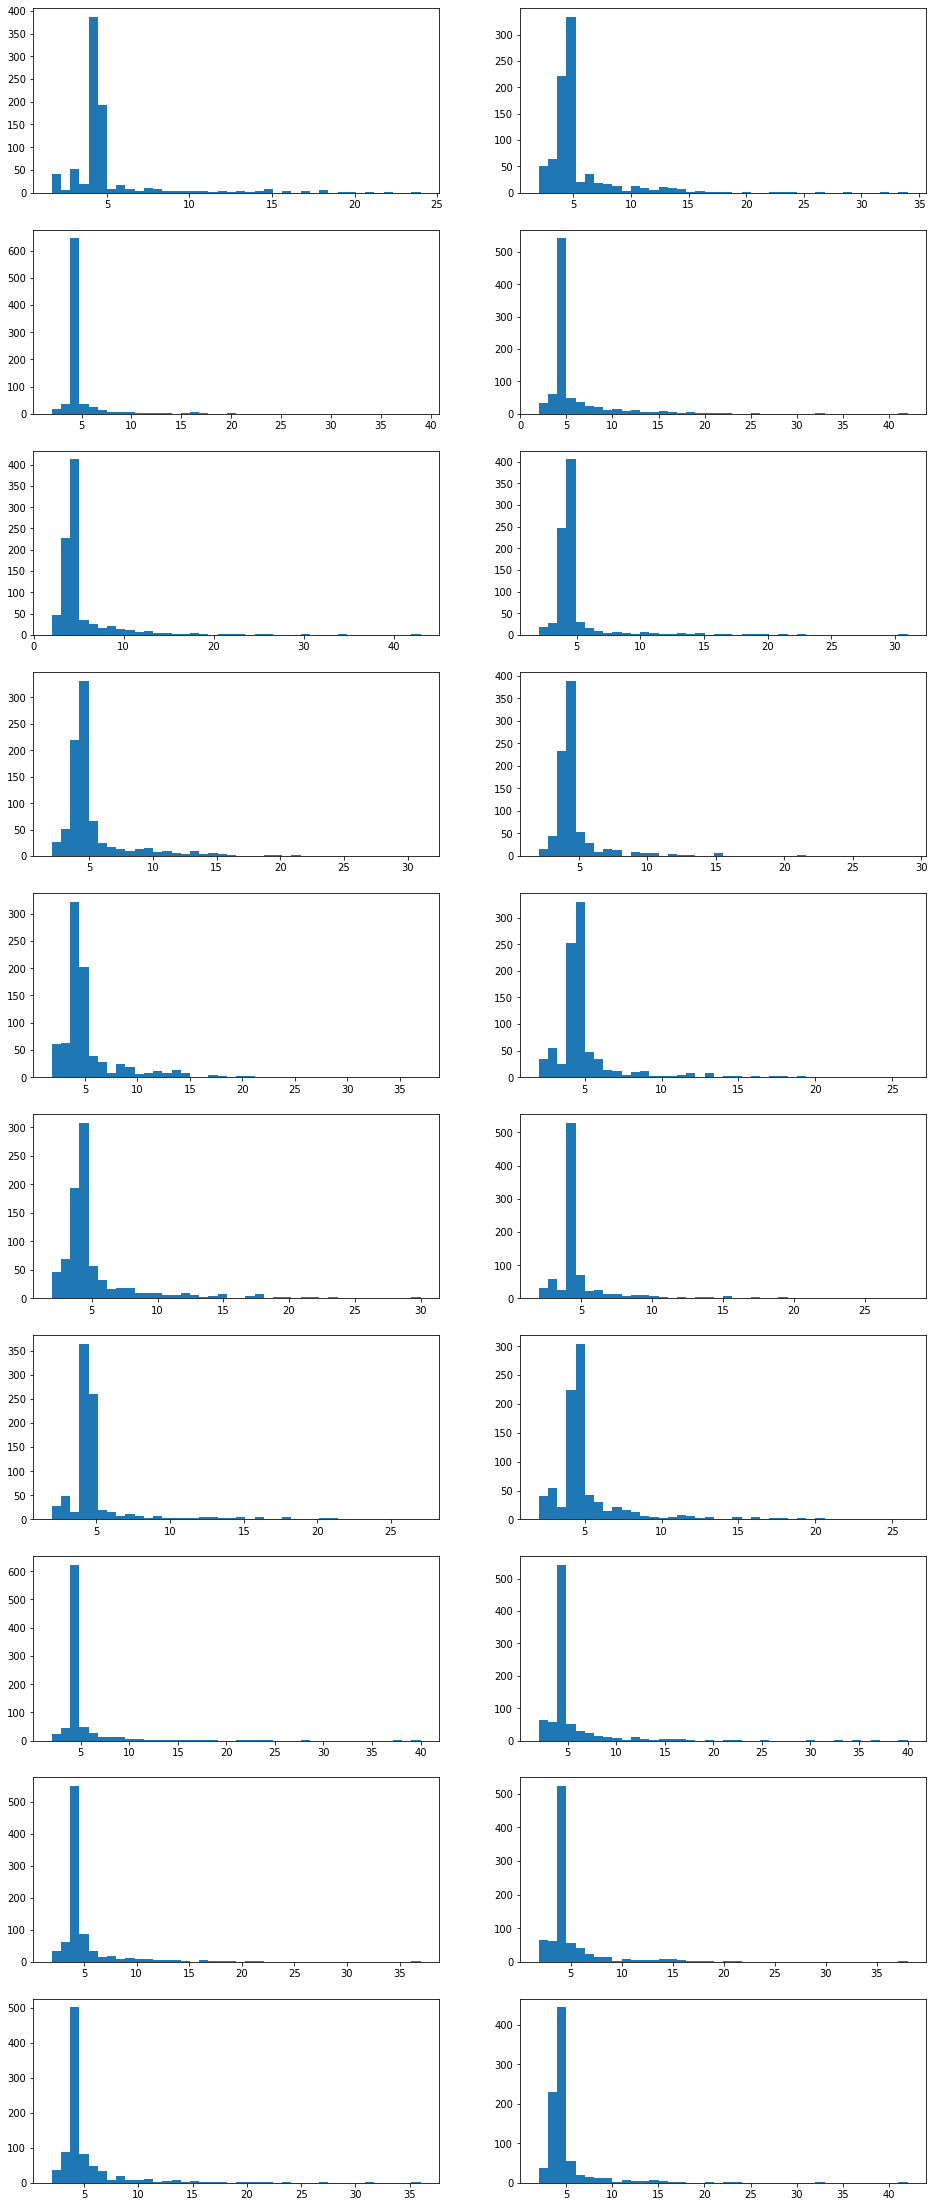

In [86]:
fig, axs = plt.subplots(10, 2, figsize=(16, 40))
for i in range(20):
  row, col = i//2, i%2
  axs[row, col].hist(dikt[i], bins=40)

## CIFAR10 (First 20 images, 2048 neurons from Conv)

In [87]:
cifar10_otpt = np.load("/homes/rgaurav/spiking_investigation/experiment_outputs/cifar10/model_1/nengo_loihi_otpts/"
                    "/Layer_probes_otpt_batch_start_0_end_20.npy", allow_pickle=True)
cifar10_otpt = get_loihi_probes_output(cifar10_otpt, 50)
print(cifar10_otpt.keys())
cifar10_conv = cifar10_otpt["conv2d_1.0"]
dikt = {}
for i, mat in enumerate(cifar10_conv):
  neurons_isi = []
  for neuron in range(mat.shape[1]):
    isi_lst = get_isi(mat[:, neuron])
    if isi_lst:
      neurons_isi.append(np.mean(isi_lst))
  dikt[i] = neurons_isi

dict_keys(['dense_1.0', 'conv2d_1.0'])


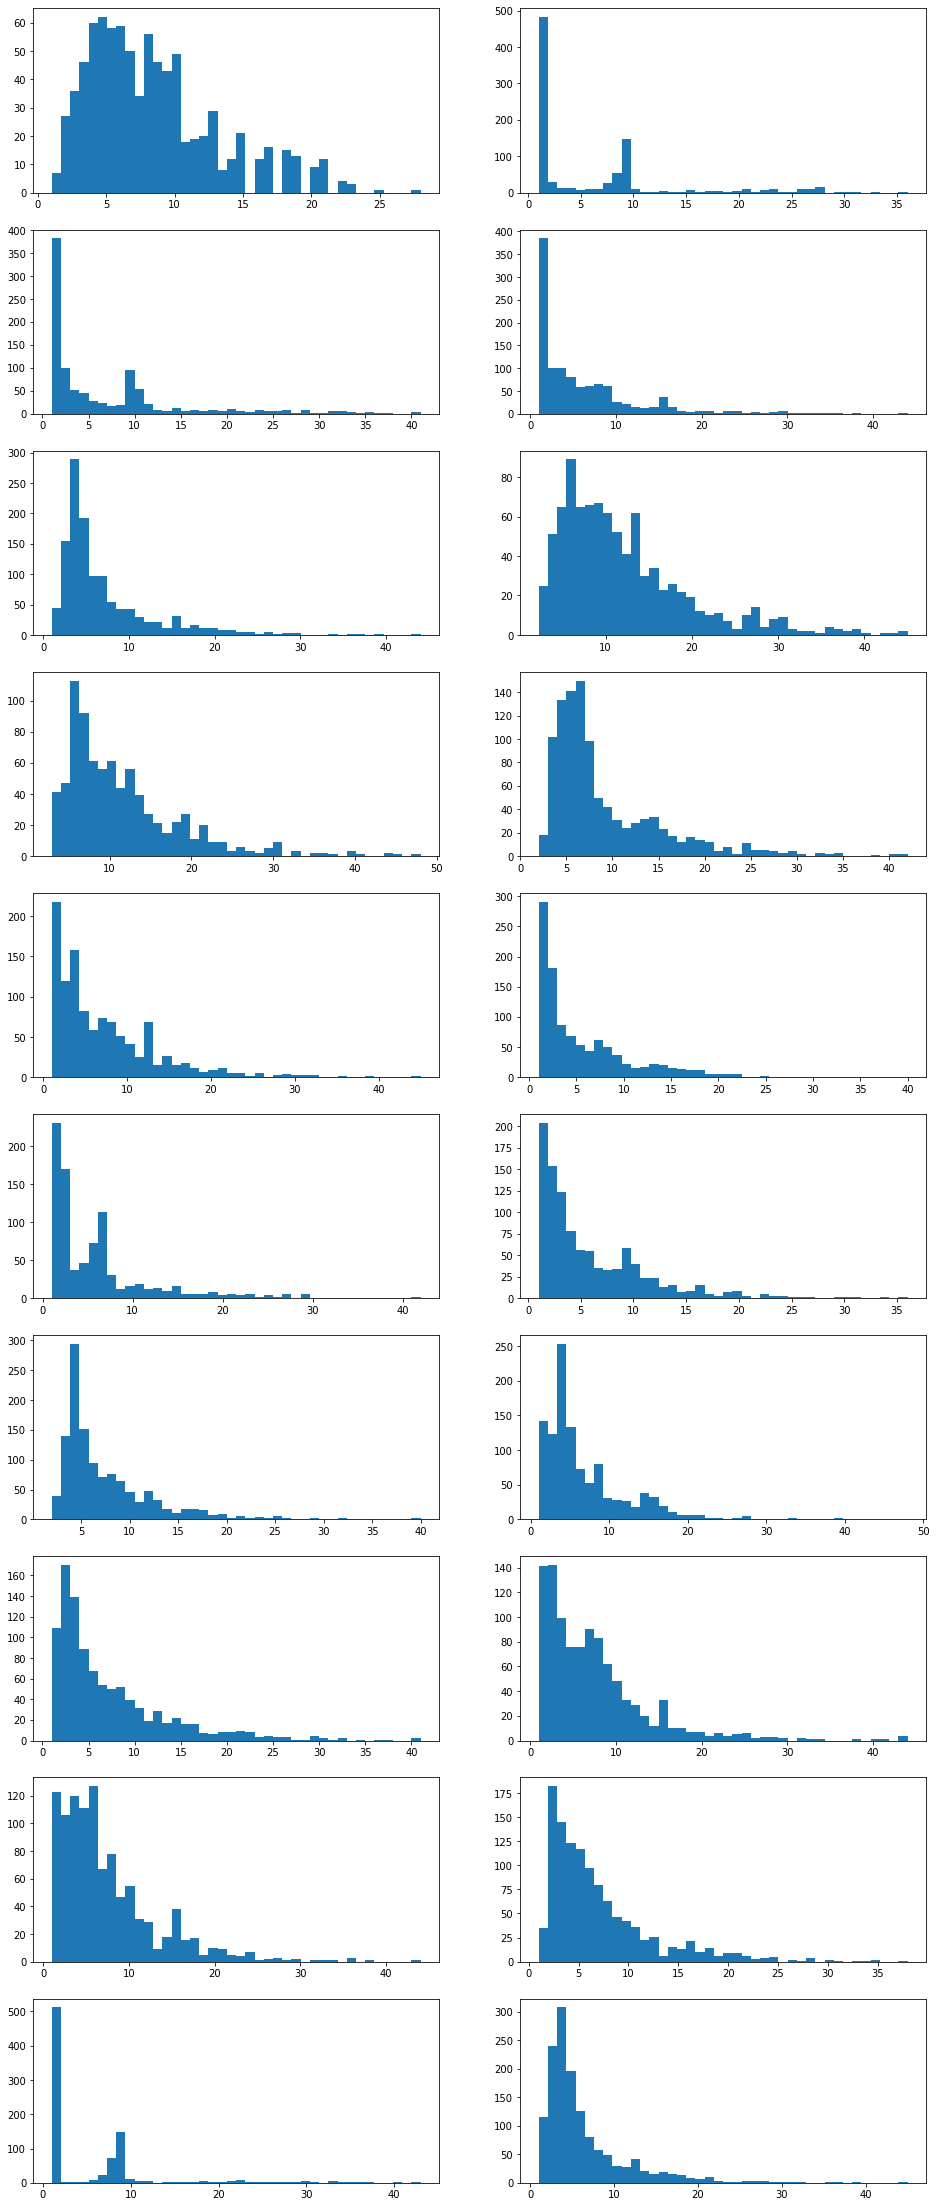

In [88]:
fig, axs = plt.subplots(10, 2, figsize=(16, 40))
for i in range(20):
  row, col = i//2, i%2
  axs[row, col].hist(dikt[i], bins=40)